<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


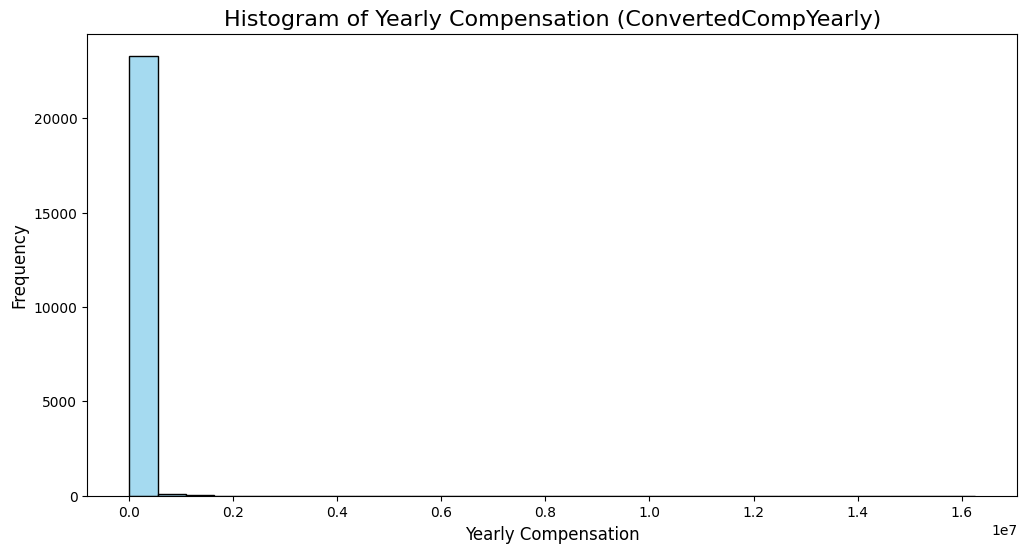

/tmp/ipykernel_758/3807366464.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['ConvertedCompYearly'], shade=True, color='orange', alpha=0.7)


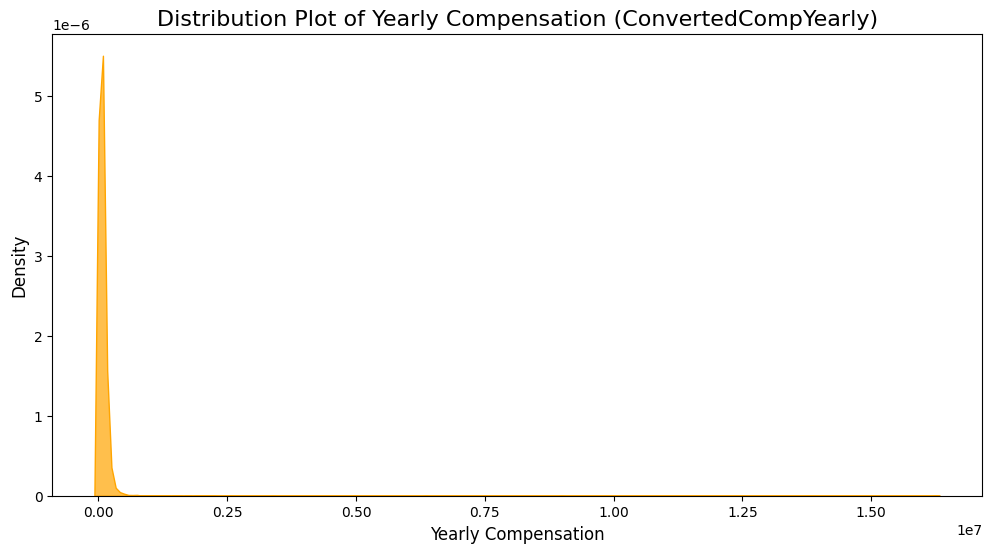

In [3]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Plot a Histogram for ConvertedCompYearly
plt.figure(figsize=(12, 6))

# Create histogram
sns.histplot(df['ConvertedCompYearly'], kde=False, bins=30, color='skyblue')

# Add title and labels
plt.title('Histogram of Yearly Compensation (ConvertedCompYearly)', fontsize=16)
plt.xlabel('Yearly Compensation', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show plot
plt.show()

# Step 2: Plot a Distribution Plot (KDE)
plt.figure(figsize=(12, 6))

# Create distribution plot
sns.kdeplot(df['ConvertedCompYearly'], shade=True, color='orange', alpha=0.7)

# Add title and labels
plt.title('Distribution Plot of Yearly Compensation (ConvertedCompYearly)', fontsize=16)
plt.xlabel('Yearly Compensation', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show plot
plt.show()


<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [4]:
## Write your code here
# Step 1: Filter the data for "Employed, full-time"
full_time_employees = df[df['Employment'] == 'Employed, full-time']

# Step 2: Calculate the median compensation for full-time employees
median_compensation = full_time_employees['ConvertedCompYearly'].median()

# Display the result
print(f"Median Compensation for Full-Time Employees: {median_compensation}")


Median Compensation for Full-Time Employees: 69814.0


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



/tmp/ipykernel_758/2738816660.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='ConvertedCompYearly', data=df_clean, palette='Set3')


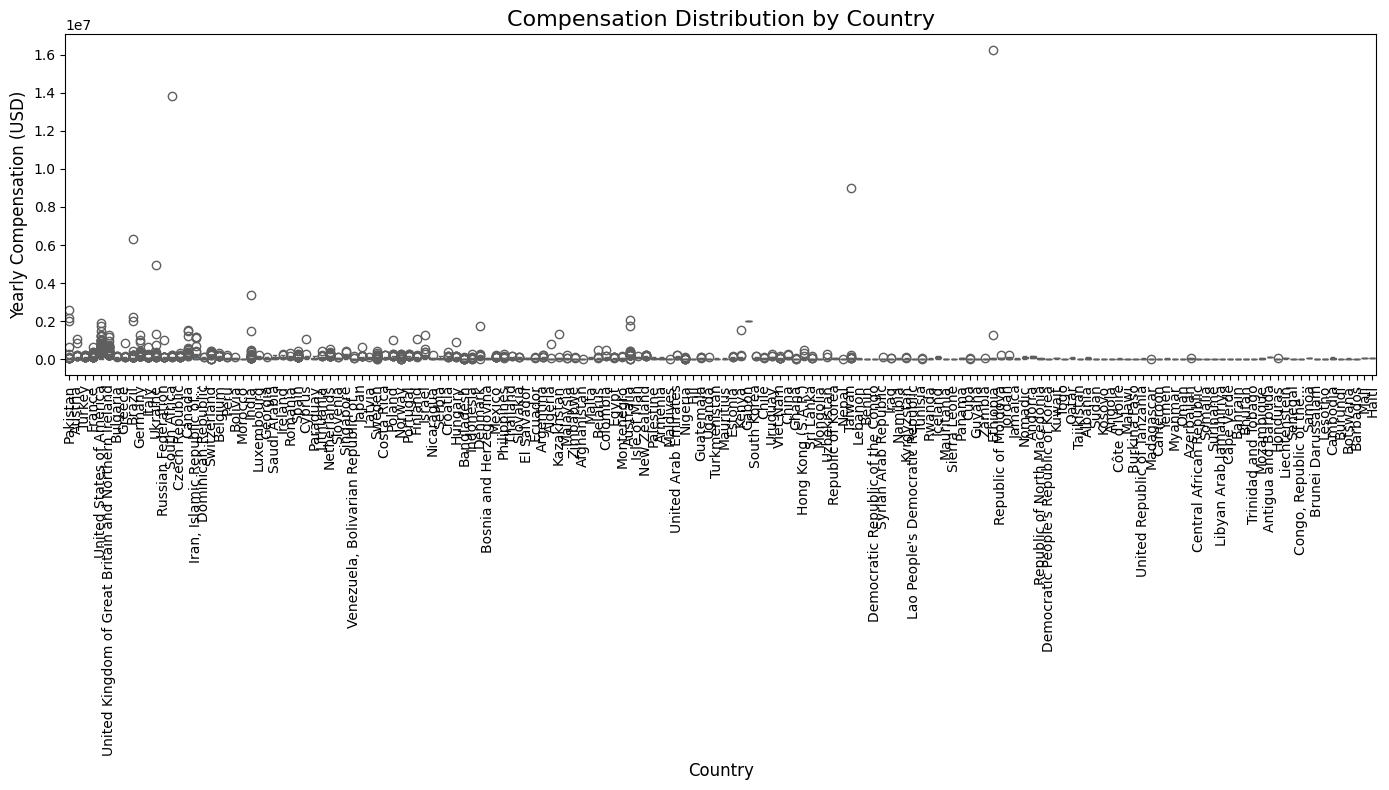

In [5]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Remove any rows where 'ConvertedCompYearly' or 'Country' is missing
df_clean = df.dropna(subset=['ConvertedCompYearly', 'Country'])

# Step 2: Create a box plot to compare compensation distributions across countries
plt.figure(figsize=(14, 8))
sns.boxplot(x='Country', y='ConvertedCompYearly', data=df_clean, palette='Set3')

# Step 3: Enhance plot appearance
plt.xticks(rotation=90)  # Rotate country labels for better readability
plt.title('Compensation Distribution by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Yearly Compensation (USD)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [6]:
## Write your code here
# Step 1: Calculate the IQR for ConvertedCompYearly
Q1 = df['ConvertedCompYearly'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df['ConvertedCompYearly'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile Range

# Step 2: Define the bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out rows where ConvertedCompYearly is outside of the bounds
df_filtered = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Step 4: Validate the size of the new DataFrame
print(f"Original dataset size: {df.shape[0]}")
print(f"New dataset size (after removing outliers): {df_filtered.shape[0]}")


Original dataset size: 65437
New dataset size (after removing outliers): 22457


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


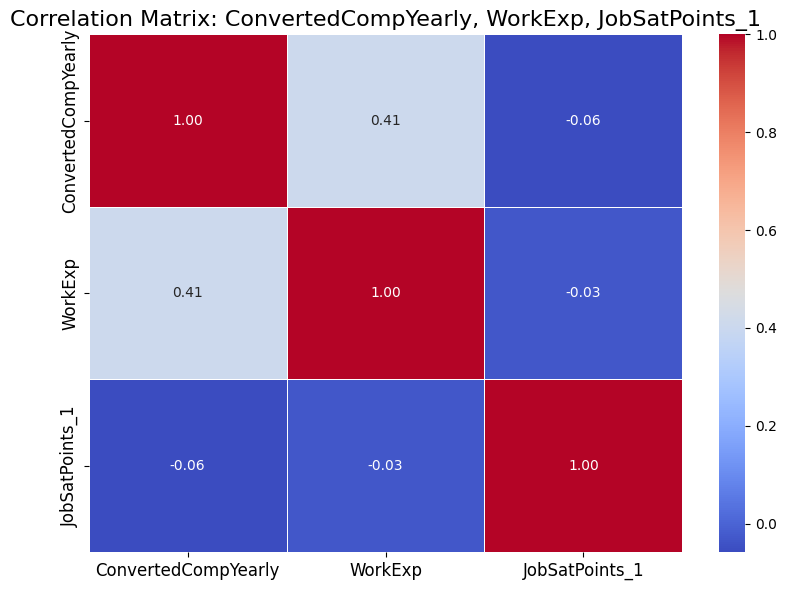

In [7]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Ensure the columns are numeric (if needed)
# Example: If JobSatPoints_1 or WorkExp are not numeric, convert them

# Step 2: Filter only the relevant columns
df_corr = df_filtered[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']]

# Step 3: Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Step 4: Visualize the correlations using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: ConvertedCompYearly, WorkExp, JobSatPoints_1', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


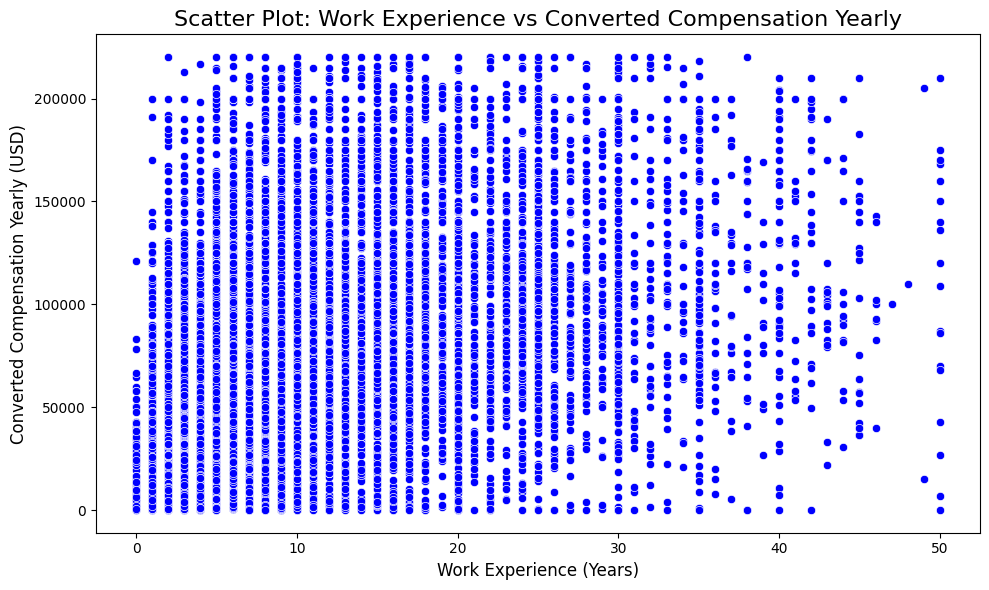

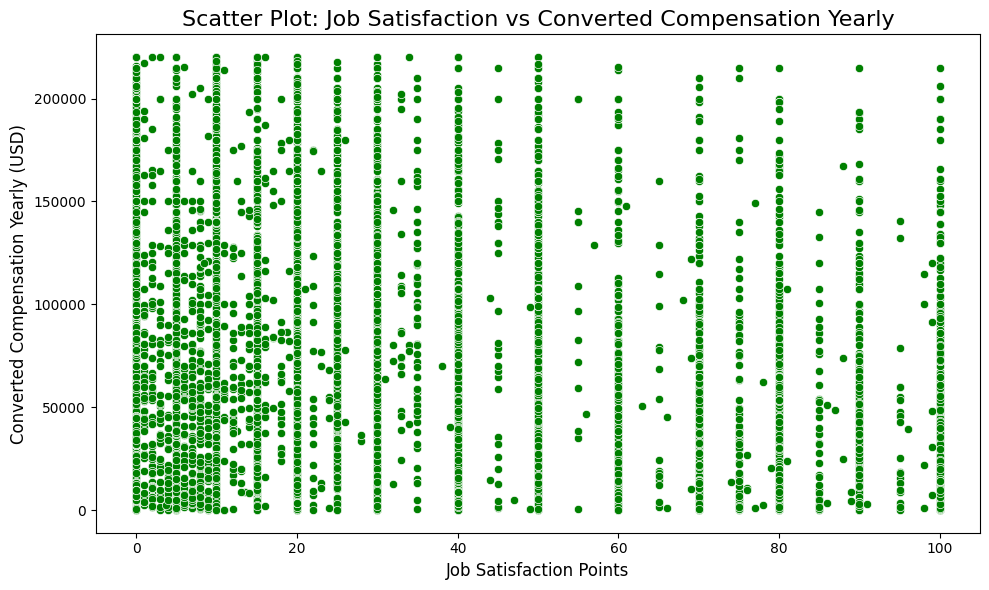

In [8]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Scatter plot for ConvertedCompYearly vs WorkExp
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WorkExp', y='ConvertedCompYearly', data=df_filtered, color='blue')
plt.title('Scatter Plot: Work Experience vs Converted Compensation Yearly', fontsize=16)
plt.xlabel('Work Experience (Years)', fontsize=12)
plt.ylabel('Converted Compensation Yearly (USD)', fontsize=12)
plt.tight_layout()
plt.show()

# Step 2: Scatter plot for ConvertedCompYearly vs JobSatPoints_1
plt.figure(figsize=(10, 6))
sns.scatterplot(x='JobSatPoints_1', y='ConvertedCompYearly', data=df_filtered, color='green')
plt.title('Scatter Plot: Job Satisfaction vs Converted Compensation Yearly', fontsize=16)
plt.xlabel('Job Satisfaction Points', fontsize=12)
plt.ylabel('Converted Compensation Yearly (USD)', fontsize=12)
plt.tight_layout()
plt.show()


<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
